In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib as plt

# Packages for text pre-processing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Package for splitting the input data
from sklearn.model_selection import train_test_split

# Metrics to evaluate model performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Packages for building an ML model
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

In [2]:
# Dataset - E-commerce customer service questions and topics
# https://github.com/sambit9238/Machine-Learning/blob/master/question_topic.csv
questions_df = pd.read_csv('./datasets/question_topic.csv', index_col=0)
questions_df.sample(5)

,question_text,question_topic
950,"What is the fit on the Lacoste pique polo, Ite...",Product Comparison
362,If I were to buy this one table lamp (3019968)...,Shipping
695,I was checking out the KitchenAid dishwasher (...,Product Availability
2948,Between the Cole Haan womens coat (Item #130YP...,Product Comparison
859,What pair of wireless headphones have a longer...,Product Comparison


In [3]:
questions_df.shape

(5000, 2)

In [4]:
questions_df.question_topic.unique() # all questions are related to 7 unique topics

array(['Sales/Promotions', 'Shipping', 'Product Availability',
       'Product Specifications', 'Omnichannel', 'Product Comparison',
       'Returns & Refunds'], dtype=object)

In [5]:
X = questions_df['question_text']
y = questions_df['question_topic']

In [6]:
count_vectorizer = CountVectorizer(ngram_range=(2,2))
transformed_vector = count_vectorizer.fit_transform(X)
transformed_vector.shape

(5000, 29892)

In [7]:
tfidf_transformer = TfidfTransformer()
tfidf_vector = tfidf_transformer.fit_transform(transformed_vector)
tfidf_vector.shape

(5000, 29892)

In [8]:
X_dense = tfidf_vector.todense() # naive bayes requires the input be in a form of dense matrix
X_dense.shape

(5000, 29892)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2)
x_train.shape, x_test.shape

((4000, 29892), (1000, 29892))

In [10]:
# helper function
def summarize_classification(y_test, y_pred, avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    precision = precision_score(y_test, y_pred, average=avg_method) 
    recall = recall_score(y_test, y_pred, average=avg_method)
    cm = confusion_matrix(y_test, y_pred)
    
    print('Length of the testing data: ', len(y_test))
    print('Accuracy count: ', num_acc)
    print('Accuracy score: ', acc)
    print('Precision score: ', precision)
    print('Recall score: ', recall)
    cm_display = ConfusionMatrixDisplay(cm).plot()

In [12]:
clf = GaussianNB().fit(np.array(x_train), y_train)

Length of the testing data:  1000
Accuracy count:  958
Accuracy score:  0.958
Precision score:  0.9584418704509422
Recall score:  0.958


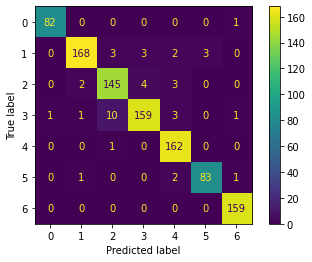

In [13]:
y_pred = clf.predict(np.array(x_test))
summarize_classification(y_test, y_pred)

In [14]:
pred_results = pd.DataFrame({'y_test':pd.Series(np.array(y_test)),
                            'y_pred':pd.Series(y_pred)})

pred_results.sample(15)

,y_test,y_pred
648,Product Specifications,Product Specifications
13,Product Availability,Product Availability
741,Omnichannel,Omnichannel
446,Omnichannel,Omnichannel
249,Omnichannel,Omnichannel
254,Shipping,Shipping
921,Omnichannel,Shipping
995,Omnichannel,Omnichannel
918,Product Specifications,Product Specifications
836,Shipping,Shipping
